# **Importing Pandas/Numpy/Seaborn/Matplotlib**

---


1.We will import pandas with `import` keyword

2.Pandas is a python package which consist mainly two data structure:
- Series
- DataFrame


In [3]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

# **Loading Titanic_database csv file**

---



>Now we will load our Titanic database .csv file into a pandas DataFrame by using pandas `read_csv()` function.

>We will also look at first 5 rows of the database to have a look what type of data is actually present in which we need to analyze.
this can be achieved by `head()` method.

In [4]:
passengers=pd.read_csv('/content/Titanic database.csv')
passengers.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Description of the attributes of the dataset**

- PassengerId -> Unique passenger id
- Survived -> Survival(0=NO;1=YES)
- Pclass -> Passenger Class(1=1st class;2=2nd class;3=3rd class)
- Name -> name of the passenger
- Sex -> Male or Female
- Age -> age of passenger
- SibSp -> number of passenger's sibling/spouse Aboard 
- Parch -> number of passenger's parents/children Aboard 
- Ticket -> passenger's ticket no.
- Fare -> Passenger's fare(British pound)
- Cabin -> Passenger's cabin no.
- Embarked -> port of embarkation(C=Cherbourg; Q=Queenstown; S=Southampton)

# **Relation b/w Survived attribute and Pclass attribute**

---





>Here `c1s0`(class 1 survival 0) is a 2 dimentional pandas DataFrame in which we used boolean indexing such that `c1s0` has two columns `Pclass` and `Survived` and the contents i.e values in each row is any one of the
combination:`(True,True)`;`(True,False)`;`(False,True)`;`(False,False)`.

>Similarly just like `c1s0`  `c2s0` and `c3s0` are also 2 dimentional pandas DataFrame.

>`x1`,`x2`,`x2` are 1 dimentional panda series with multi indexes and consists only 4 rows in it bceause there are only 4 unique combination,so the multiindex are as follows: `(True,True)`;`(True,False)`;`(False,True)`;`(False,False)`.

In [ ]:
c1s0=passengers[['Pclass','Survived']]==[1,0]
c2s0=passengers[['Pclass','Survived']]==[2,0]
c3s0=passengers[['Pclass','Survived']]==[3,0]
x1=c1s0.value_counts()
x2=c2s0.value_counts()
x3=c3s0.value_counts()
print('the number of people who died and belong to 1st class:',x1[(True,True)])
print('the number of people who died and belong to 2nd class:',x2[(True,True)])
print('the number of people who died and belong to 3rd class:',x3[(True,True)])

the number of people who died and belong to 1st class: 80
the number of people who died and belong to 2nd class: 97
the number of people who died and belong to 3rd class: 372


**CONCLUSION:**

>The number of people who died and belong to 3rd class is very more as compared to other classes i.e the died people percentage is greater in 3rd class

> Hence as a conclusion we can say the 3rd class was not constructed well and hence  was more dangerous than other classes.







## **Data Visualization of Relation b/w Survived attribute and Pclass attribute**

> This can also be visualized using Bar garph with the help of seaborn's `countplot()` function. 

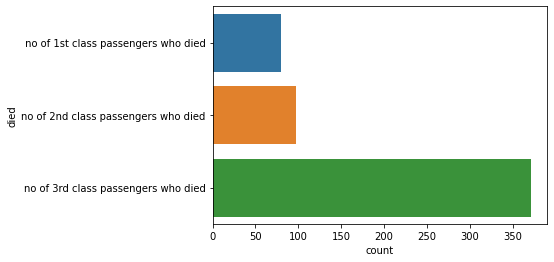

In [ ]:
i1={'died':[' no of 1st class passengers who died']*x1[(True,True)]}
i2=[{'died':'no of 2nd class passengers who died'}]*x2[(True,True)]
i3=[{'died':'no of 3rd class passengers who died'}]*x3[(True,True)]
c1died=pd.DataFrame(i1)
c2died=pd.DataFrame(i2)
c3died=pd.DataFrame(i3)
xaxis=c1died.append(c2died).append(c3died)
sb.countplot(data=xaxis,y='died')

# **Relation b/w Survived attribute and Sex attribute**

---

> Here first we check for `NaN `values with the help of `isna()` function in combination with `sum()` function.

> Then we created two 2-dimentional Pandas DataFrame `sms0`(sex male survival 0) and `sfs0`(sex female survival 0) which contains True,False values i.e boolean values.

> the variable `ms`(male survival) and `fs`(female survival) are two 1-dimentional pandas Series contains 4 rows each with muti indexs as  `(True,True)`;`(True,False)`;`(False,True)`;`(False,False)`.



In [18]:
#first lets check that is there any Nan value in 'Sex' column
x=passengers[['Sex','Survived']]
if x.isna().sum()['Sex']==0:
  print('There is no NaN value')
else:
  print('Sex column contains unknown values other than male and female')
#Now lets analyse how many male died and how many female died.
sms0=passengers[['Sex','Survived']]==['male',0]
sfs0=passengers[['Sex','Survived']]==['female',0]
ms=sms0.value_counts()
fs=sfs0.value_counts()
print('The number of male that died are:',ms[(True,True)])
print('The number of female that died are:',fs[(True,True)])

There is no NaN value
The number of male that died are: 468
The number of female that died are: 81


**CONCLUSION:**

> The number of male who died was more than the number of female who died with a huge difference.

>Hence as a conclusion we can say male were more prone to death as compared to female.

## **Data Visualization of Relation b/w Survived attribute and Sex attribute**

> This can also be visualized using Bar garph with the help of seaborn's `countplot()` function. 

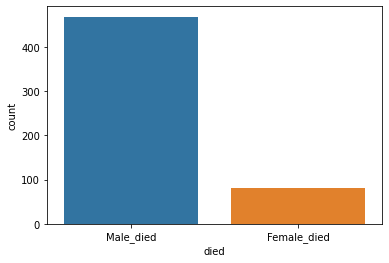

In [21]:
item1={'died':['Male_died']*ms[(True,True)]}
item2=[{'died':'Female_died'}]*fs[(True,True)]
md=pd.DataFrame(item1)
fd=pd.DataFrame(item2)
xaxis=md.append(fd)
sb.countplot(data=xaxis,x='died')